In [1]:
import alpdesign
import numpy as np
import haiku as hk
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from functools import partial
from jax.experimental import optimizers

### Initialize data

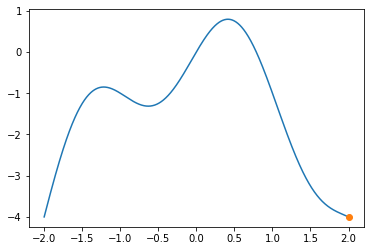

In [2]:
x = np.linspace(-2,2, 1000)
reps = np.array([2.0]).reshape(-1,1)
label_fxn = lambda x: np.sin(x * np.pi) - x ** 2
labels = label_fxn(reps)
plt.plot(x,  label_fxn(x))
plt.plot(reps, labels, 'o')

In [3]:
(4, *reps[0].shape)

(4, 1)

In [4]:
config = alpdesign.EnsembleBlockConfig()
forward_fxn_t, full_forward_fxn_t = alpdesign.build_model(config)

In [5]:

batch_size = 16
def loop(key, reps, params):
    labels = label_fxn(reps)
    final_vec, params, train_loss, bo_loss = alpdesign.alg_iter(key, reps, labels, forward_fxn_t,full_forward_fxn_t,config)
    # compute plot
    yhat_mu, yhat_std = [], []    
    plot_forward = partial(forward_fxn_t.apply, params, None)
    for xi in x:
        v = plot_forward(xi[np.newaxis])
        yhat_mu.append(float(v[0]))
        yhat_std.append(jnp.sqrt(float(v[1])))
    # add new label
    plt.figure()
    plt.plot(train_loss)
    plt.show()
    reps = jnp.concatenate((reps, final_vec[np.newaxis]))    
    return key, reps, yhat_mu, yhat_std, final_vec, params
    
    

0


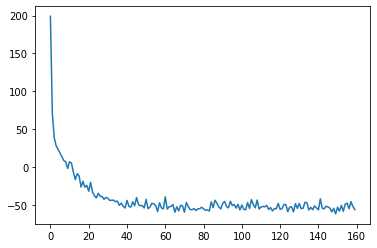

[[ 2.        ]
 [-0.13749625]]
1


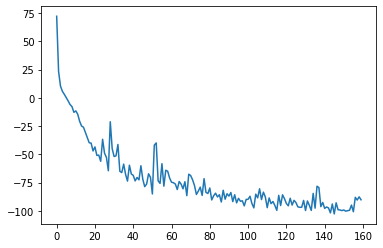

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]]
2


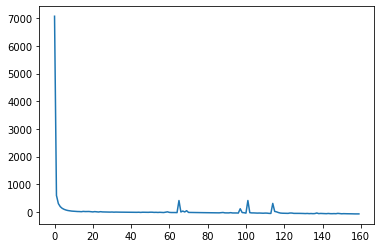

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]]
3


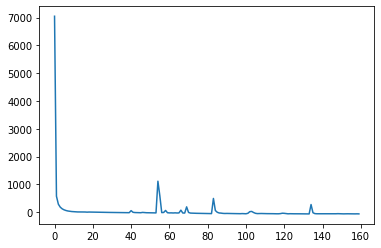

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]]
4


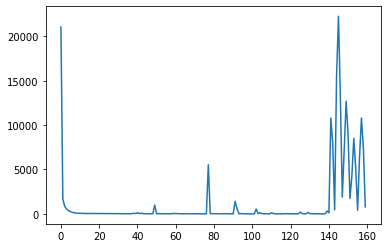

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]]
5


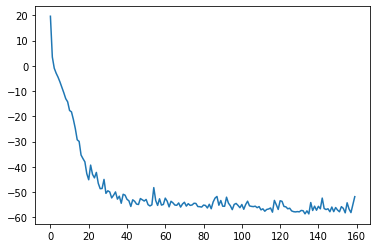

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]]
6


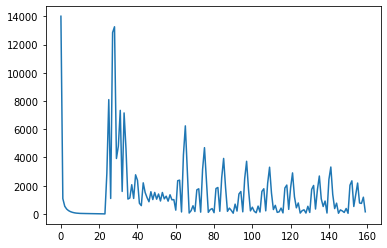

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]
 [ 7.364903  ]]
7


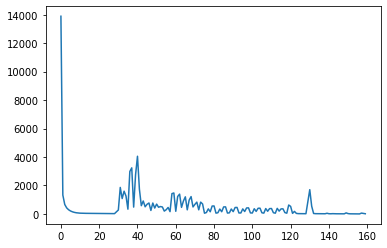

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]
 [ 7.364903  ]
 [ 0.57006276]]
8


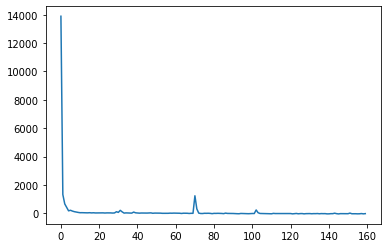

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]
 [ 7.364903  ]
 [ 0.57006276]
 [ 0.8938335 ]]
9


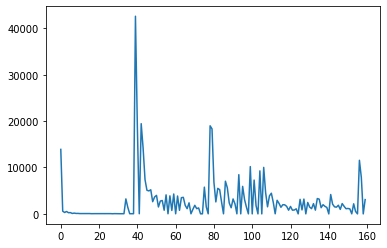

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]
 [ 7.364903  ]
 [ 0.57006276]
 [ 0.8938335 ]
 [ 0.59941655]]
10


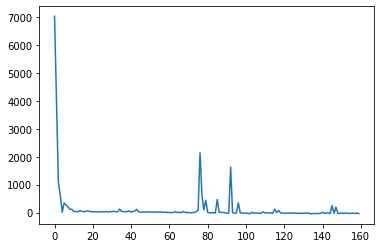

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]
 [ 7.364903  ]
 [ 0.57006276]
 [ 0.8938335 ]
 [ 0.59941655]
 [ 0.5979435 ]]
11


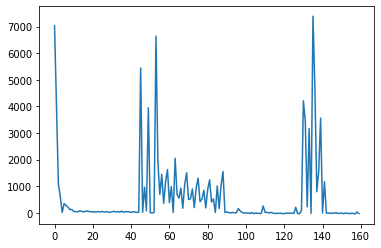

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]
 [ 7.364903  ]
 [ 0.57006276]
 [ 0.8938335 ]
 [ 0.59941655]
 [ 0.5979435 ]
 [ 0.6393199 ]]
12


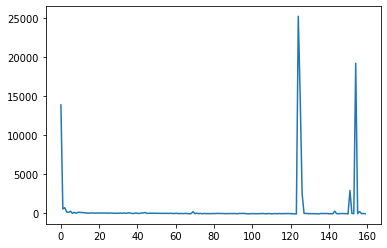

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]
 [ 7.364903  ]
 [ 0.57006276]
 [ 0.8938335 ]
 [ 0.59941655]
 [ 0.5979435 ]
 [ 0.6393199 ]
 [ 0.5742224 ]]
13


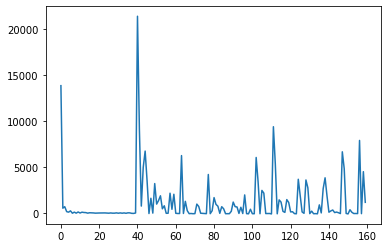

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]
 [ 7.364903  ]
 [ 0.57006276]
 [ 0.8938335 ]
 [ 0.59941655]
 [ 0.5979435 ]
 [ 0.6393199 ]
 [ 0.5742224 ]
 [ 0.6282144 ]]
14


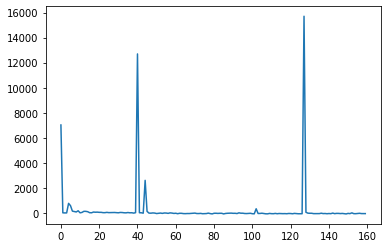

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]
 [ 7.364903  ]
 [ 0.57006276]
 [ 0.8938335 ]
 [ 0.59941655]
 [ 0.5979435 ]
 [ 0.6393199 ]
 [ 0.5742224 ]
 [ 0.6282144 ]
 [ 1.6306467 ]]
15


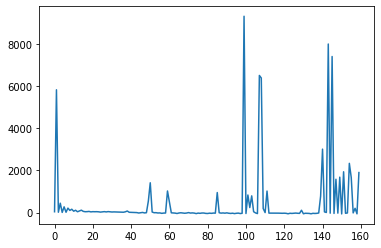

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]
 [ 7.364903  ]
 [ 0.57006276]
 [ 0.8938335 ]
 [ 0.59941655]
 [ 0.5979435 ]
 [ 0.6393199 ]
 [ 0.5742224 ]
 [ 0.6282144 ]
 [ 1.6306467 ]
 [ 0.65519845]]
16


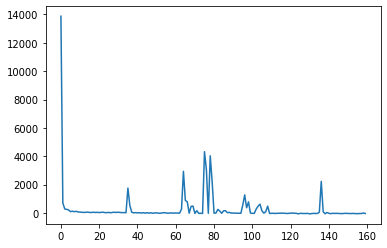

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]
 [ 7.364903  ]
 [ 0.57006276]
 [ 0.8938335 ]
 [ 0.59941655]
 [ 0.5979435 ]
 [ 0.6393199 ]
 [ 0.5742224 ]
 [ 0.6282144 ]
 [ 1.6306467 ]
 [ 0.65519845]
 [ 0.570721  ]]
17


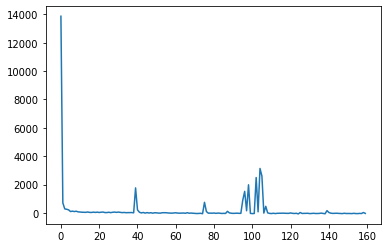

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]
 [ 7.364903  ]
 [ 0.57006276]
 [ 0.8938335 ]
 [ 0.59941655]
 [ 0.5979435 ]
 [ 0.6393199 ]
 [ 0.5742224 ]
 [ 0.6282144 ]
 [ 1.6306467 ]
 [ 0.65519845]
 [ 0.570721  ]
 [ 0.56793237]]
18


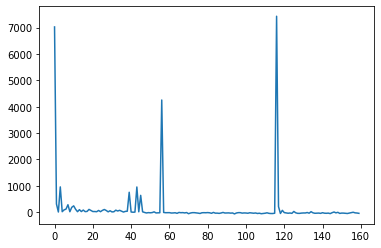

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]
 [ 7.364903  ]
 [ 0.57006276]
 [ 0.8938335 ]
 [ 0.59941655]
 [ 0.5979435 ]
 [ 0.6393199 ]
 [ 0.5742224 ]
 [ 0.6282144 ]
 [ 1.6306467 ]
 [ 0.65519845]
 [ 0.570721  ]
 [ 0.56793237]
 [ 0.58028144]]
19


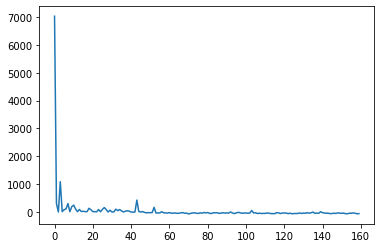

[[ 2.        ]
 [-0.13749625]
 [-6.833103  ]
 [-0.06853855]
 [ 0.03125354]
 [ 0.03206413]
 [ 0.08014814]
 [ 7.364903  ]
 [ 0.57006276]
 [ 0.8938335 ]
 [ 0.59941655]
 [ 0.5979435 ]
 [ 0.6393199 ]
 [ 0.5742224 ]
 [ 0.6282144 ]
 [ 1.6306467 ]
 [ 0.65519845]
 [ 0.570721  ]
 [ 0.56793237]
 [ 0.58028144]
 [ 0.58788663]]


In [6]:
key = jax.random.PRNGKey(0)

yhat_mus = []
yhat_stds = []
final_vecs = []
repss = []
params = None
for i in range(20):
    print(i)
    key, reps, yhat_mu, yhat_std, final_vec, params= loop(key, reps, params)
    print(reps)
    yhat_mus.append(yhat_mu)
    yhat_stds.append(yhat_std)
    final_vecs.append(final_vec)
    repss.append(reps)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


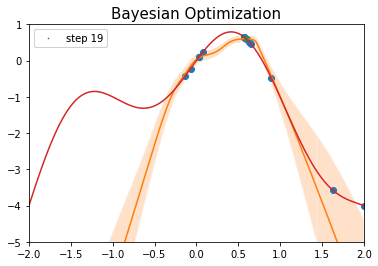

In [7]:
from celluloid import Camera
fig = plt.figure()
camera = Camera(fig)

for i in range(20):
    plt.plot(np.squeeze(repss[i][:-1]), label_fxn(np.squeeze(repss[i][:-1])), 'o', color='C0')
    plt.plot(x, yhat_mus[i], color='C1')
    plt.xlim(-2,2)
    #print(x.shape)
    #print()
    print(i)
    plt.ylim([-5, 1])
    plt.plot(final_vecs[i][0], label_fxn(final_vecs[i][0]), '*', color='C2')
    plt.plot(x, label_fxn(x), color='C3')
    plt.errorbar(x, yhat_mus[i], yerr=yhat_stds[i], color='C1', alpha=0.05)
    plt.legend(['step %d' % (i)] , markerscale=0.1)
    plt.title('Bayesian Optimization', fontsize=15)
    camera.snap()
animation = camera.animate(interval = 2000, repeat = True,
                           repeat_delay = 500)
animation.save('BO_1.gif', writer = 'imagemagick', dpi=180)